<a href="https://colab.research.google.com/github/charithasrii/noobeper/blob/main/emotionanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers -q

     |████████████████████████████████| 4.7 MB 5.5 MB/s 
     |████████████████████████████████| 6.6 MB 27.0 MB/s 
     |████████████████████████████████| 120 kB 48.2 MB/s 


In [ ]:
from transformers import pipeline

In [ ]:
# tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

In [ ]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
emo = emotion("im happy")

In [ ]:
emo

[{'label': 'joy', 'score': 0.9556365013122559}]

In [ ]:
import pandas as pd

In [ ]:
text= pd.read_csv('/content/emobank.csv')

In [ ]:
text

,text
0,"Remember what she said in my last letter? """
1,If I wasn't working here.
2,".."""
3,Goodwill helps people get off of public assist...
4,Sherry learned through our Future Works class ...
...,...
10057,Please let it be a constant reminder of all yo...
10058,That’s why I want to extend my appreciation fo...
10059,And why I’m writing you today to ask you to re...
10060,"In fact, I want to urge you to strengthen your..."


In [ ]:
text=text[:998]

In [ ]:
text['text'][1:910].apply(emotion)

1      [{'label': 'neutral', 'score': 0.9974838495254...
2      [{'label': 'neutral', 'score': 0.9815627336502...
3      [{'label': 'neutral', 'score': 0.6974198222160...
4      [{'label': 'optimism', 'score': 0.575617611408...
5      [{'label': 'approval', 'score': 0.426311522722...
                             ...                        
905    [{'label': 'realization', 'score': 0.851272702...
906    [{'label': 'anger', 'score': 0.8385772109031677}]
907    [{'label': 'neutral', 'score': 0.9235056042671...
908    [{'label': 'realization', 'score': 0.796401500...
909    [{'label': 'neutral', 'score': 0.9933283329010...
Name: text, Length: 909, dtype: object

In [ ]:
def get_emotion_label(text):
  return (emotion(text)[0]['label'])

In [ ]:
text['text'][1:910].apply(get_emotion_label)

1          neutral
2          neutral
3          neutral
4         optimism
5         approval
          ...     
905    realization
906          anger
907        neutral
908    realization
909        neutral
Name: text, Length: 909, dtype: object

In [ ]:
text['emotion']=text['text'].apply(get_emotion_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from transformers.pipelines import text_classification
text_classification

<module 'transformers.pipelines.text_classification' from '/usr/local/lib/python3.7/dist-packages/transformers/pipelines/text_classification.py'>

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

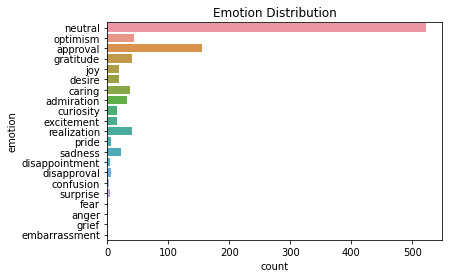

In [ ]:
sns.countplot(data=text,y='emotion').set_title("Emotion Distribution")